<a href="https://colab.research.google.com/github/meanjos/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importando as bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##2. Importando a base de dados a ser analisada

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


##3. Leitura e Exploração Inicial da Base

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# pd.read_csv(): função do pandas para ler um arquivo CSV e transformar num DataFrame (tabela).
# encoding='latin1': diz pro pandas que o arquivo tá codificado com o padrão latin1, para evitar erro de leitura com caracteres especiais.
# df: variável que guarda a planilha em forma de tabela no Python.

print(df.head()) # Exibir as 5 primeiras linhas do DataFrame.
print(df.shape) # Retorna uma tupla com o número de linhas e colunas do DataFrame.
print(df.columns) # Mostra o nome de todas as colunas da tabela.
print(df.dtypes) # Apresenta o tipo de dado de cada coluna.

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

🔍 ***Insight:***

A partir do df.head() e df.columns(), foi possível observar algumas vendas para países como USA e França, todas com o status "Shipped".

As quantidades e os valores de venda variam entre os pedidos.

Todas as linhas visíveis pertencem ao ano de 2003, o que levanta a hipótese de que a base pode estar restrita a esse período.

A base já apresenta colunas com quantidade e valor unitário, bem como uma coluna com o valor total. Ademais, a base conta com uma coluna para a data do pedido e uma coluna adicional para indicação apenas do mês do pedido ("Month_ID").

Com o comando df.dtypes(), identificamos que os dados são compostos por colunas dos tipos int64, float64 e object. Não há colunas booleanas.


-->   ***Possíveis Análises Futuras***

- Identificar todos os países presentes na base de dados.

- Confirmar se a base contém apenas registros do ano de 2003.

- Verificar se a base considera somente pedidos com status "Shipped" ou se há outros status disponíveis.

- Analisar a lógica de classificação da coluna "DEALSIZE", entendendo seu range, e como ela se relaciona com quantidade e valores de venda por pedido.

- Verificar se é possível identificar os produtos e partir para análises de preço médio vendido, relacionando a quantidade de itens no pedido (verificar descontos por proporção de itens)

- Verificar as análises por períodos: mensal, trimestral, semestral e anual (utilizando a coluna "Month_ID" como suporte).

##4. Listas, Dicionários e Tuplas

In [5]:
# Lista: Coluna de texto/categórica
cidades = list(df['CITY'])
for cidade in cidades[:5]:
    print(cidade)

NYC
Reims
Paris
Pasadena
San Francisco


In [10]:
# Dicionário: chave e valor
dicionario = dict(zip(df['PRODUCTLINE'][0:50], df['PRODUCTCODE'][0:50]))
print(dicionario)

{'Motorcycles': 'S10_1678', 'Classic Cars': 'S10_1949'}


In [9]:
# Tupla: informações de uma linha
linha0 = df.iloc[0]
minha_tupla = (linha0['PRODUCTLINE'], linha0['CUSTOMERNAME'], linha0['PRICEEACH'])
print(minha_tupla)

('Motorcycles', 'Land of Toys Inc.', np.float64(95.7))


##🔍 Insight:

- A lista nos mostra que as vendas ocorreram em diferentes locais, em cidades situadas no USA e na França, reforçando a análise realizada posteriormente com o df.head() e df.columns().

- O dicionário permite associar cada produto ao seu respectivo código. Quando observamos um intervalo de 50 linhas e obtemos apenas 2 chaves-valores, isso indica que esses itens foram vendidos com mais frequência. Essa recorrência pode revelar tanto a popularidade dessas categorias quanto um possível foco estratégico da empresa nessas linhas.

- Com a tupla vemos que clientes como Land of Toys Inc. compram produtos da linha Motorcycles com valor unitário de aproximadamente 95,70 dólares.
Possivel ação: verificar sobre categorizar os clientes para localizar tendências de nicho?

##5. Estruturas Condicionais e Laços

In [17]:
# Escolhendo uma coluna numérica adequada
coluna_numerica = 'MONTH_ID'
lista = list(df[coluna_numerica])  # pega todos os valores da coluna sem limitar

# Pegando o primeiro valor para usar na condição
primeiro_valor = lista[0]

# Estrutura condicional personalizada para o primeiro valor
# Substitua os valores conforme a sua base
if primeiro_valor <= 3:
    print("1º Trimestre")
elif 4 <= primeiro_valor <= 6:
    print("2º Trimestre")
elif 7 <= primeiro_valor <= 9:
    print("3º Trimestre")
else:
    print("4º Trimestre")

# For para contar quantas vendas ocorreram por trimestre
t1 = t2 = t3 = t4 = 0

# Percorrer todos os meses para contar as vendas em cada trimestre
for n in lista:
    if 1 <= n <= 3:
        t1 += 1
    elif 4 <= n <= 6:
        t2 += 1
    elif 7 <= n <= 9:
        t3 += 1
    else:
        t4 += 1

print("1º Trimestre:", t1, "venda(s)")
print("2º Trimestre:", t2, "venda(s)")
print("3º Trimestre:", t3, "venda(s)")
print("4º Trimestre:", t4, "venda(s)")

# While: Encontrar o primeiro mês maior que um certo limite
limite = 10  # Ajuste conforme o contexto da coluna escolhida
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1

if i < len(lista):
    print(f"Quantidade de vendas até o mês {limite}: {i}")
    print(f"Quantidade de vendas após o mês {limite}: {len(lista) - i}")
else:
    print(f"Nenhum mês maior que {limite} encontrado na lista.")
    print(f"Total de vendas na lista: {len(lista)}")



1º Trimestre
1º Trimestre: 665 venda(s)
2º Trimestre: 561 venda(s)
3º Trimestre: 503 venda(s)
4º Trimestre: 1094 venda(s)
Quantidade de vendas até o mês 10: 6
Quantidade de vendas após o mês 10: 2817


##🔍 Insight:
- A estrutura condicional aplicada ao primeiro valor da coluna MONTH_ID indica o trimestre do primeiro registro da base, mas essa análise sozinha pode ser limitada se os dados não estiverem ordenados por data. Para entender melhor o início do período analisado, seria ideal verificar o menor mês presente na base e a cronologia dela.

- O loop for conta a quantidade de vendas em cada trimestre, mostrando que as vendas estão distribuídas ao longo do ano, com um número maior de vendas no 4º trimestre. Isso sugere uma sazonalidade ou maior movimentação no final do ano, o que pode ser importante para planejamento de estoque e marketing, por exemplo.

- A lógica do while para encontrar o primeiro mês maior que 10 (novembro/dezembro) e separar as vendas antes e depois desse mês traz um insight útil para segmentar o ano em períodos e analisar diferenças no volume de vendas entre eles. Isso permite identificar se há um salto ou queda nas vendas no final do ano, ajudando na tomada de decisão.

- ⚠ Atenção: É importante validar se todas as vendas pertencem ao mesmo ano ou se a base contém múltiplos anos. Isso impacta a análise temporal e pode exigir ajustes para comparar períodos equivalentes. Também vale investigar outras variáveis, como status da venda, localização geográfica e tamanho do pedido, para enriquecer as conclusões e entender melhor o comportamento dos clientes.

##6. Operadores Aritméticos e Manipulação de Dados

In [23]:
# Exemplo 1: diferença entre duas colunas numéricas
if 'SALES' in df.columns and 'PRICEEACH' in df.columns:
    df['Diferenca'] = df['SALES'] - df['PRICEEACH']
    print(df[['SALES', 'PRICEEACH', 'Diferenca']].head())

print("\n\n")


# Exemplo 2: preço com desconto (10%)
if 'PRICEEACH' in df.columns:
    df['Desconto'] = df['PRICEEACH'] * 0.9
    print(df[['PRICEEACH', 'Desconto']].head())


     SALES  PRICEEACH  Diferenca
0  2871.00      95.70    2775.30
1  2765.90      81.35    2684.55
2  3884.34      94.74    3789.60
3  3746.70      83.26    3663.44
4  5205.27     100.00    5105.27



   PRICEEACH  Desconto
0      95.70    86.130
1      81.35    73.215
2      94.74    85.266
3      83.26    74.934
4     100.00    90.000


##🔍 Insight:
- Ao criar a coluna “Diferenca” entre o valor total da venda (SALES) e o preço unitário (PRICEEACH), observei que o resultado parece representar a diferença entre o valor total e o preço de um único item, indicando que seria interessante analisar a relação com a quantidade vendida.

- A nova coluna “Desconto” mostra o preço com 10% de desconto, possibilitando estudar o impacto de promoções no preço unitário dos produtos.

##7. NumPy e Arrays Numéricos

In [31]:
# Criando um array a partir da coluna QUANTITYORDERED
array = np.array(df['QUANTITYORDERED'])

# Operações NumPy
array_somado = array + 10
array_quadrado = array ** 2

# Mostrando os primeiros elementos dos arrays
print("Quantidade original:", array[:5])
print("Quantidade original + 10:",array_somado[:5])
print("Quantidade original ao quadrado:",array_quadrado[:5])

print('\n')

# Operações agregadas
print("Soma dos elementos:", array.sum())
print("Média dos elementos:", array.mean())


Quantidade original: [30 34 41 45 49]
Quantidade original + 10: [40 44 51 55 59]
Quantidade original ao quadrado: [ 900 1156 1681 2025 2401]


Soma dos elementos: 99067
Média dos elementos: 35.09280906836698


##🔍 Insight:
O array NumPy da coluna QUANTITYORDERED mostra que os primeiros pedidos têm quantidades entre 30 e 49 unidades. Quando somamos +10 em cada um, percebemos que os valores continuam relativamente baixos, sugerindo que os pedidos não são feitos em grandes lotes.

Além disso, a média geral de quantidade indica o padrão médio de venda por pedido, o que reforça as quantidades vistas na análise anterior, e que também pode ajudar a elaborar uma dinâmica de estoque.

##8. Acesso e Manipulação de Dados com Pandas

In [33]:
# Selecionando colunas específicas com .loc
selecionados = df.loc[:, ['PRODUCTLINE', 'SALES']]

# Contando quantos produtos existem em cada categoria
contagem_produtos = df['PRODUCTLINE'].value_counts()
print("Contagem de produtos por linha (categoria):")
print(contagem_produtos)

# Agrupando e somando as vendas por linha de produto
vendas_por_linha = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

print("\n")

# Mostrando o resultado em formato Markdown
print("### Vendas por linha de produto:")
print(vendas_por_linha)


Contagem de produtos por linha (categoria):
PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64


### Vendas por linha de produto:
PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


##🔍 Insight:

- A linha de produtos “Classic Cars” se destaca tanto em quantidade quanto em faturamento, com 967 registros e mais de 3,9 milhões em vendas, liderando com folga nas duas métricas. Em contraste, “Trains” aparece como a categoria menos expressiva, com apenas 77 registros e R$ 226 mil em vendas. Isso indica uma concentração nas categorias mais clássicas e tradicionais, como carros antigos e de coleção, sugerindo forte apelo comercial nesse nicho.

##9. Visualização de Dados

 ## Gráfico de Barras — Vendas por Linha de Produto

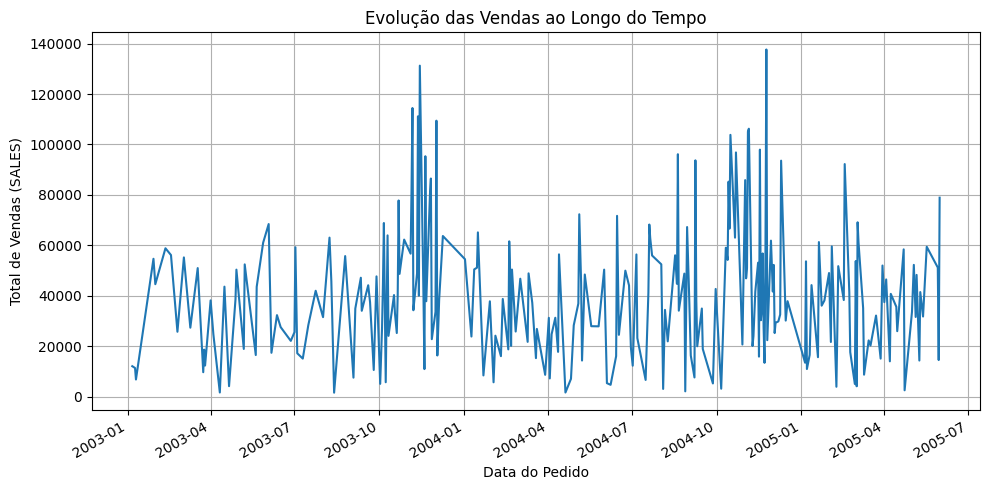

In [34]:
# Convertendo 'ORDERDATE' para datetime se ainda não estiver
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Agrupando por data e somando as vendas
df.groupby('ORDERDATE')['SALES'].sum().plot(kind='line', figsize=(10, 5))
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Vendas (SALES)')
plt.grid(True)
plt.tight_layout()
plt.show()


Esse gráfico de linha mostra a tendência das vendas ao longo do tempo. Dá pra notar variações de pico, sugerindo que existem períodos com maior volume de vendas — talvez promoções ou sazonalidades específicas que impactam o desempenho da empresa.

## Gráfico de Barras — Vendas por Linha de Produto

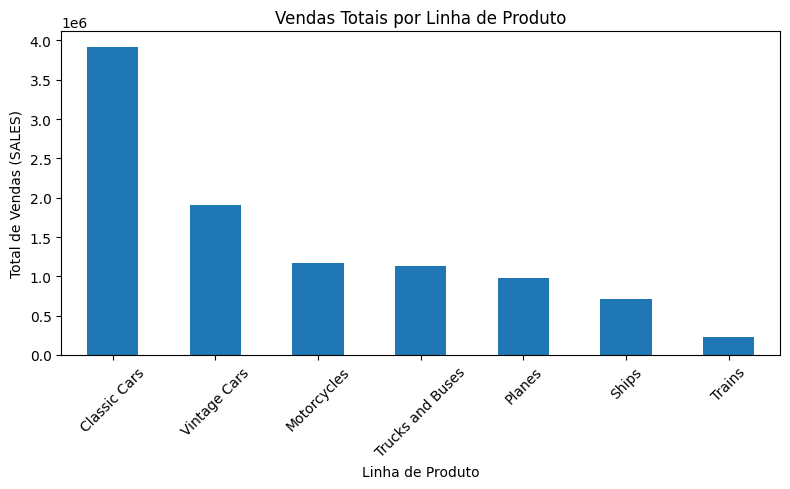

In [36]:
# Agrupando por linha de produto e somando as vendas
df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))
plt.title('Vendas Totais por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Total de Vendas (SALES)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualmente, percebemos que “Classic Cars” domina em faturamento, seguido por “Vintage Cars” e “Motorcycles”. As categorias “Trains” e “Ships” ficam bem atrás. Isso reforça o interesse dos consumidores em veículos clássicos e de coleção.

## Gráfico de Dispersão — Preço x Quantidade Vendida

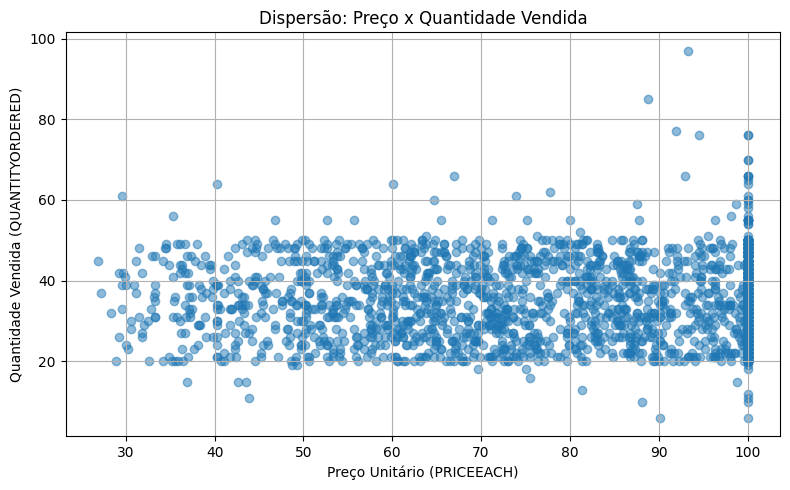

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(df['PRICEEACH'], df['QUANTITYORDERED'], alpha=0.5)
plt.title('Dispersão: Preço x Quantidade Vendida')
plt.xlabel('Preço Unitário (PRICEEACH)')
plt.ylabel('Quantidade Vendida (QUANTITYORDERED)')
plt.grid(True)
plt.tight_layout()
plt.show()


A maioria das vendas ocorre em faixas de preço mais baixas, com quantidades variadas, mas geralmente menores. Produtos caros raramente são comprados em grandes volumes.

📊 Relatório Final — Análise da Base de Vendas


Neste projeto, explorei a base de dados de vendas disponível em [Sample Sales Data - Kaggle](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data), que contém 2823 linhas e 25 colunas. A base traz informações detalhadas sobre pedidos, clientes, produtos, preços, datas e localizações.

Principais descobertas:

- As vendas estão distribuídas entre 2003 e 2005.

- A distribuição das vendas por trimestre é razoavelmente uniforme, em quantidade de vendas, com destaque para um pico no 4º trimestre, indicando uma possível sazonalidade no final do ano.

- A linha de produtos “Classic Cars” é a mais frequente e a que gera maior faturamento, seguida por “Vintage Cars” e “Motorcycles”. Linhas como “Trains” apresentam pouca representatividade.

- Os preços unitários variam bastante. Produtos mais caros são raramente comprados em grandes quantidades, confirmando que itens premium têm vendas mais pontuais.

- A evolução das vendas ao longo do tempo mostra variações que sugerem picos em períodos específicos, como promoções ou datas comemorativas, que merecem uma investigação futura.

- A base não apresenta colunas booleanas, mas combina variáveis numéricas e categóricas que permitem diversas análises e segmentações futuras, como, por exemplo, entender o perfil dos clientes por região.

--> Possíveis perguntas para investigar em uma próxima análise:

- Qual o impacto das diferentes regiões (país, cidade, estado) no volume e valor das vendas?

- É possível identificar padrões sazonais mais específicos, como promoções de final de mês, semana ou feriados?

- Existe algum perfil de cliente que compra produtos mais caros com maior frequência?

